In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Silver_Data.csv')

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/19/2023,23.948,23.560,24.010,23.555,0.15K,1.81%
1,05/18/2023,23.523,23.840,23.840,23.380,0.35K,-1.12%
2,05/17/2023,23.789,23.830,23.940,23.650,0.18K,0.03%
3,05/16/2023,23.783,24.115,24.115,23.710,0.18K,-1.62%
4,05/15/2023,24.175,24.030,24.270,23.945,0.17K,0.09%
...,...,...,...,...,...,...,...
1275,05/25/2018,16.546,16.690,16.740,16.500,72.71K,-0.84%
1276,05/24/2018,16.687,16.475,16.715,16.420,91.02K,1.72%
1277,05/23/2018,16.405,16.555,16.600,16.330,89.46K,-1.03%
1278,05/22/2018,16.575,16.530,16.700,16.465,73.53K,0.33%


# PREPROCESSING DATA

In [ ]:
df = df[['Price']]
# Flip the column
df = df.iloc[::-1]

# Drop missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

# SPLITTING DATA(7-2-1)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# LINEAR REGRESSION

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

In [ ]:
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [ ]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the  prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted Silver prices for the next 30 days
print('Predicted Silver prices for the next 30 days:')
print(y_next_30_days)

Predicted Silver prices for the next 30 days:
[19.51120542 19.50768866 19.5041719  19.50065514 19.49713839 19.49362163
 19.49010487 19.48658811 19.48307135 19.4795546  19.47603784 19.47252108
 19.46900432 19.46548757 19.46197081 19.45845405 19.45493729 19.45142053
 19.44790378 19.44438702 19.44087026 19.4373535  19.43383675 19.43031999
 19.42680323 19.42328647 19.41976971 19.41625296 19.4127362  19.40921944]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  4.630632308144541
Testing MAE:  4.504160031409568
Testing MAPE:  28.98280830497093
Validation RMSE:  4.598882034428373
Validation MAE:  4.4853409793794246
Validation MAPE:  29.890476721050074


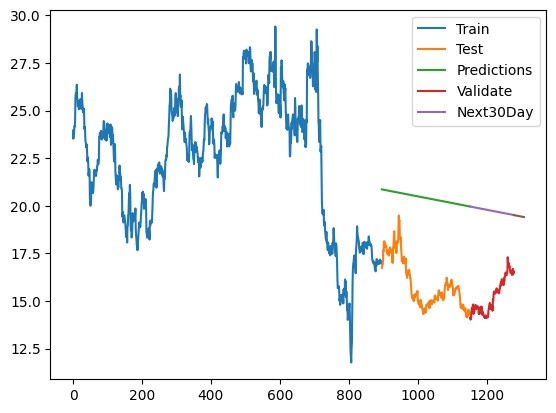

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1117.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.72e-176
Time:                        09:03:29   Log-Likelihood:                -3288.4
No. Observations:                1280   AIC:                             6581.
Df Residuals:                    1278   BIC:                             6591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5246      0.177    144.526      0.0

# SPLITTING DATA(6-3-1)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted prices for the next 30 days
print('Predicted Silver prices for the next 30 days:')
print(y_next_30_days)

Predicted Silver prices for the next 30 days:
[26.27623167 26.27942414 26.28261661 26.28580908 26.28900155 26.29219402
 26.29538649 26.29857897 26.30177144 26.30496391 26.30815638 26.31134885
 26.31454132 26.31773379 26.32092627 26.32411874 26.32731121 26.33050368
 26.33369615 26.33688862 26.34008109 26.34327357 26.34646604 26.34965851
 26.35285098 26.35604345 26.35923592 26.36242839 26.36562087 26.36881334]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  9.251064289586099
Testing MAE:  9.117896120475883
Testing MAPE:  57.7480902904785
Validation RMSE:  10.846663551827287
Validation MAE:  10.81762194253924
Validation MAPE:  71.46314077645235


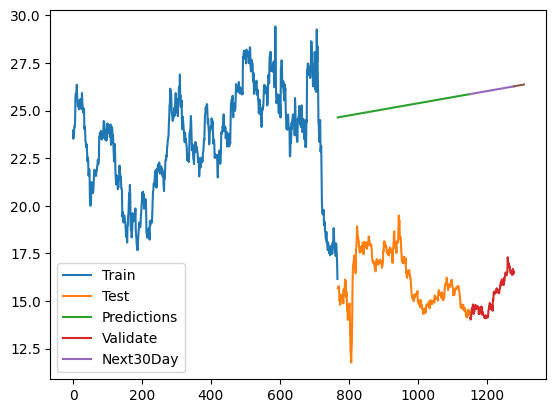

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1117.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.72e-176
Time:                        09:03:29   Log-Likelihood:                -3288.4
No. Observations:                1280   AIC:                             6581.
Df Residuals:                    1278   BIC:                             6591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5246      0.177    144.526      0.0

# SPLITTING DATA(5-3-2)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the Silver prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted Silver prices for the next 30 days
print('Predicted Silver prices for the next 30 days:')
print(y_next_30_days)

Predicted Silver prices for the next 30 days:
[30.74793436 30.75543992 30.76294548 30.77045103 30.77795659 30.78546215
 30.79296771 30.80047326 30.80797882 30.81548438 30.82298993 30.83049549
 30.83800105 30.8455066  30.85301216 30.86051772 30.86802328 30.87552883
 30.88303439 30.89053995 30.8980455  30.90555106 30.91305662 30.92056217
 30.92806773 30.93557329 30.94307885 30.9505844  30.95808996 30.96559552]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  9.7752640458315
Testing MAE:  8.871411412831035
Testing MAPE:  53.1282270990208
Validation RMSE:  14.586904420055204
Validation MAE:  14.566208571834512
Validation MAPE:  96.11691153592706


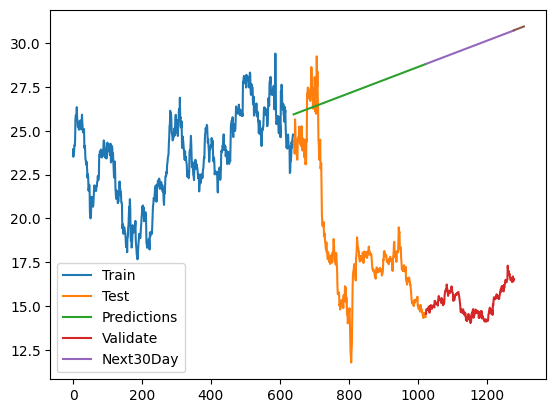

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1117.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.72e-176
Time:                        09:03:30   Log-Likelihood:                -3288.4
No. Observations:                1280   AIC:                             6581.
Df Residuals:                    1278   BIC:                             6591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5246      0.177    144.526      0.0

# EVALUATING MODEL

---
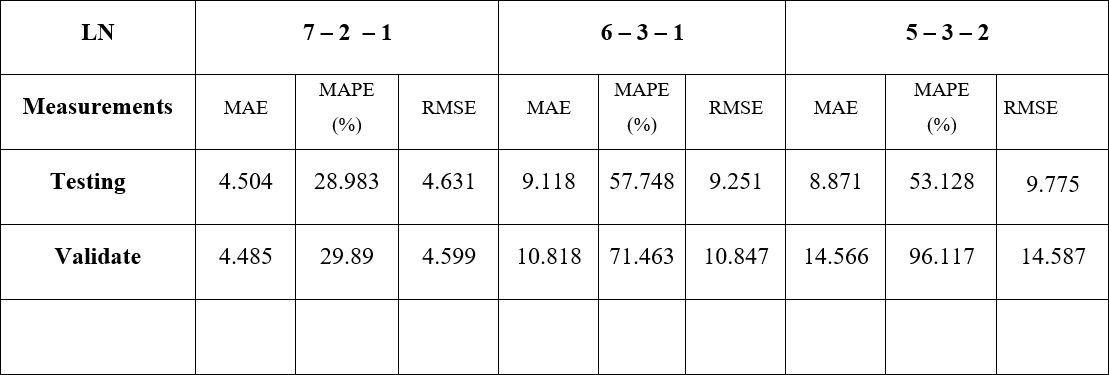